#**Soal Basic**

**Import Libraries**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import os
from scipy import stats
import scipy.stats as st
import statsmodels.stats.proportion as sp

**Import Dataset**

In [ ]:
SourceFile = '/content/drive/MyDrive/train.csv'
df = pd.read_csv(SourceFile)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [ ]:
df.shape

(1460, 81)

## **Soal No.1** 

### **Proses Data**

In [ ]:
#Mencari nilai ukuran pemusatan dan penyebaran dari kolom saleprice
Mode = df.SalePrice.mode()
MAX = df.SalePrice.max()
MIN = df.SalePrice.min()
Q1 = df.SalePrice.quantile(0.25)
Q3 = df.SalePrice.quantile(0.75)
R = MAX-MIN
QR = Q3-Q1
QD = (Q3-Q1)/2
print('Jangkauan',R)
print('Jangkauan kuartil',QR)
print('Simpangan kuartil',QD)
print('Modus',Mode[0])
df.SalePrice.describe()

Jangkauan 720100
Jangkauan kuartil 84025.0
Simpangan kuartil 42012.5
Modus 140000


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### **Kesimpulan**

Ukuran Pemusatan Data dari Kolom SalePrice sebagai berikut :

*   Mean(nilai rata-rata) dari nilai SalePrice adalah 180921.195890.
*   Median(nilai tengah) dari nilai SalePrice adalah 163000.
*   Modus(nilai yang paling sering muncul) dari nilai SalePrice adalah 140000.

Ukuran Penyebaran Data dari Kolom SalePrice sebagai berikut :

*   Range(jangkauan yang didapat dari selisih nilai terbesar - nilai terkecil) dari nilai SalePrice adalah 720100.
*   Quartile Range(nilai selisih kuartil atas dengan kuartil bawah) dari nilai SalePrice adalah 84025.0.
*   Quartile Deviation(nilai setengah dari selisih kuartil atas dengan kuartil bawah) dari nilai SalePrice adalah 42012.5.
*   Standard Deviation(impangan baku merupakan nilai statistik yang menjelaskan tingkat homogenitas (atau keseragamanan) dari suatu data kelompok) dari nilai SalePrice adalah 79442.502883.











## **Soal No.2** 

### **Proses Data**

In [ ]:
#Mencari nilai ukuran pemusatan dan penyebaran dari kolom SalePrice setiap tahun nya
df.groupby('YrSold')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
YrSold,,,,,,,,
2006,314.0,182549.458599,79426.838855,35311.0,131375.0,163995.0,218782.5,625000.0
2007,329.0,186063.151976,85768.171410,39300.0,129900.0,167000.0,219500.0,755000.0
2008,304.0,177360.838816,69735.610685,40000.0,131250.0,164000.0,207000.0,446261.0
2009,338.0,179432.103550,80879.237311,34900.0,125250.0,162000.0,212750.0,582933.0
2010,175.0,177393.674286,80451.280085,55000.0,128100.0,155000.0,213250.0,611657.0


In [ ]:
#Mencari nilai modus dari kolom SalePrice setiap tahun nya
df.groupby(['YrSold']).agg({'SalePrice': lambda x:stats.mode(x)[0]})

,SalePrice
YrSold,
2006,140000
2007,129000
2008,140000
2009,110000
2010,128000


In [ ]:
#Mencari nilai kuartil dari kolom SalePrice setiap tahun nya
dfs = df[['YrSold', 'SalePrice']]
MAX = dfs.groupby('YrSold').max()
MIN = dfs.groupby('YrSold').min()
Q1 = dfs.groupby('YrSold').quantile(0.25)
Q3 = dfs.groupby('YrSold').quantile(0.75)
R = MAX-MIN
QR = Q3-Q1
QD = (Q3-Q1)/2
dfr = pd.DataFrame(data=R)
dfqr = pd.DataFrame(data=QR)
dfqd = pd.DataFrame(data=QD)

In [ ]:
#Mencari nilai Jangkauan dari kolom SalePrice setiap tahun nya
dfr

,SalePrice
YrSold,
2006,589689
2007,715700
2008,406261
2009,548033
2010,556657


In [ ]:
#Mencari nilai Jangkauan kuartil dari kolom SalePrice setiap tahun nya
dfqr

,SalePrice
YrSold,
2006,87407.5
2007,89600.0
2008,75750.0
2009,87500.0
2010,85150.0


In [ ]:
#Mencari nilai Simpangan kuartil dari kolom SalePrice setiap tahun nya
dfqd

,SalePrice
YrSold,
2006,43703.75
2007,44800.00
2008,37875.00
2009,43750.00
2010,42575.00


### **Kesimpulan**

Ukuran Pemusatan Data dari Kolom SalePrice sebagai berikut :

*   Mean(nilai rata-rata) dari nilai SalePrice setiap tahun nya mengalami perbedaan(naik-turun-naik-turun).
*   Median(nilai tengah) dari nilai SalePrice adalah setiap tahun nya mengalami perbedaan(naik-turun-turun-turun).
*   Modus(nilai yang paling sering muncul) dari nilai SalePrice setiap tahun nya mengalami perbedaan(naik-turun-naik-turun).

Ukuran Penyebaran Data dari Kolom SalePrice sebagai berikut :

*   Range(jangkauan yang didapat dari selisih nilai terbesar - nilai terkecil) dari nilai SalePrice setiap tahun nya mengalami perbedaan(naik-turun-naik-naik).
*   Quartile Range(nilai selisih kuartil atas dengan kuartil bawah) dari nilai SalePrice setiap tahun nya mengalami perbedaan(naik-turun-naik-turun).
*   Quartile Deviation(nilai setengah dari selisih kuartil atas dengan kuartil bawah) dari nilai SalePrice setiap tahun nya mengalami perbedaan(naik-turun-naik-turun).
*   Standard Deviation(impangan baku merupakan nilai statistik yang menjelaskan tingkat homogenitas (atau keseragamanan) dari suatu data kelompok) dari nilai SalePrice setiap tahun nya emngalami perbedaan(naik-turun-naik-turun).











## **Soal No.3** 

### **Proses Data**

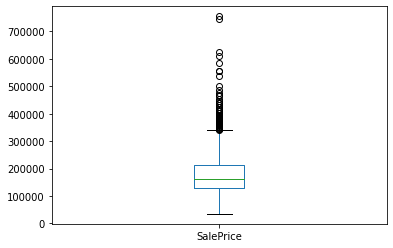

In [ ]:
#Mencari nilai outliers dari kolom SalePrice
boxplot = df.boxplot(column=['SalePrice'],grid=False, rot=0, fontsize=10)

Text(0, 0.5, 'SalePrice')

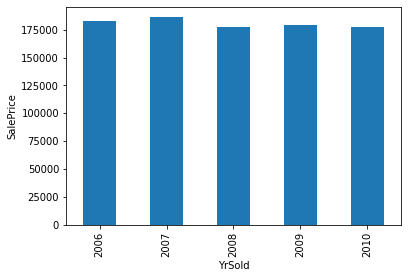

In [ ]:
#Grafik Histogram dari kolom SalePrice setiap tahun nya (Mean)
means = df.groupby(['YrSold']).mean()['SalePrice']
ax = means.plot(kind = 'bar')
ax.set_ylabel('SalePrice')

Text(0, 0.5, 'SalePrice')

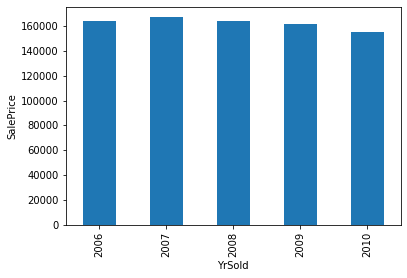

In [ ]:
#Grafik Histogram dari kolom SalePrice setiap tahun nya (Median)
median = df.groupby(['YrSold']).median()['SalePrice']
ax = median.plot(kind = 'bar')
ax.set_ylabel('SalePrice')

### **Kesimpulan**

Untuk Dataset ini lebih baik menggunakan **Median** di karenakan nilai kolom SalePrice memiliki sejumlah outlier(data yang memiliki nilai sangat jauh dari nilai umumnya, atau dengan kata lain memiliki nilai yang ekstrem).Outliers dapat mengubah kesimpulan penelitian yang diambil dari hasil analisis statistik.

## **Soal No.4** 

### **Pengujian Hipotesis**

*   Hipotesis alternatif (Ha) : secara statistik H1 diartikan bahwa terdapat perbedaan antara karakteristik populasi dan karakteristik sampel.
*   Hipotesis asosiatif : Pernyataan yang menyatakan adanya hubungan antar dua variabel.

### **Pengujian Yang Digunakan**

Pengujian satu arah karena kita sudah mengetahui arah dari hubungan antara dua variabel.

### **Asumsi dan Cara Penanganannya**

*   Asumsi : bahwa hubungan antara harga rumah setiap tahun nya tidak selalu naik.
*   Cara penanganan : melihat histogram dari persebaran data harga rumah setiap tahun nya menggunakan metode max.



### **Hasil Pengujian Hipotesis**

Text(0, 0.5, 'SalePrice')

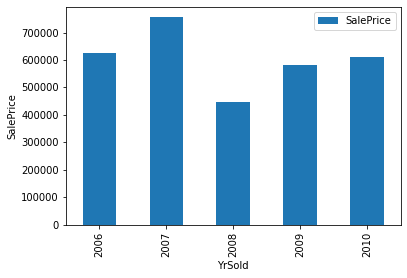

In [ ]:
#Grafik Histogram dari kolom SalePrice setiap tahun nya (Max)
max = dfs.groupby('YrSold').max()
ax = max.plot(kind = 'bar')
ax.set_ylabel('SalePrice')

### **Kesimpulan**

Kesimpulan nya adalah pernyataan bahwa setiap tahunnya harga rumah naik adalah **salah**. Karena terbukti nilai harga rumah dari chart ukuran pemusatan data (max) setiap tahun nya naik-turun.

#**Soal Advanced**

In [ ]:
SourceFile = '/content/drive/MyDrive/bank-full.csv'
df2 = pd.read_csv(SourceFile,sep=';')

In [ ]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df2.shape

(45211, 17)

In [ ]:
#membuat dataframe baru dengan kolom yang sudah di filter
df2['date'] = df2['day'].map(str) + ' ' + df2['month'].map(str)
deposit = df2[['date','age', 'campaign', 'y']]
deposit

,date,age,campaign,y
0,5 may,58,1,no
1,5 may,44,1,no
2,5 may,33,1,no
3,5 may,47,1,no
4,5 may,33,1,no
...,...,...,...,...
45206,17 nov,51,3,yes
45207,17 nov,71,2,yes
45208,17 nov,72,5,yes
45209,17 nov,57,4,no


## **Soal No.1A** 

### **Nama Eksperimen**

A/B testing untuk pembukaan akun deposit.

### **Hipotesis**

Jumlah campaign mampu meningkatkan keinginan user untuk membuka akun.

### **Participant**

User yang akan membuka akun deposit.

### **Variabel yang Akan DIuji**


*   Variabel jumlah campaign
*   Variabel y (user membuka akun atau tidak)



### **Metrics yang Digunakan**

*   Macroconversion : rate pembukaan akun deposit
*   Microconversion : jumlah campaign



### **Ukuran Sampel dan Durasi Eksperimen**

In [ ]:
N = 45211
e = 0.05 # margin of error 5%
slovin = N/(1+N * e**2)
print('Ukuran sample:', slovin)

Ukuran sample: 396.4920742803271


*   Ukuran sample adalah 400 (pembulatan)
*   Durasi adalah 5 May - 17 Nov (196 hari)


## **Soal No.1B** 

### **Pengujian Hipotesis**

In [ ]:
#mencari nilai kuantitatif dari pembukaan deposit
df2['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
#pisahkan data deposit dan non-deposit
deposits = deposit[deposit['y']=='yes']
not_deposits = deposit[deposit['y']!='yes']

In [ ]:
deposits['campaign'].mean()

2.1410474569861977

In [ ]:
not_deposits['campaign'].mean()

2.8463503832473322

H1 : rata-rata campaign deposit **berbeda signifikan** dengan campaign non-deposit

### **Pengujian Yang Digunakan**

Menggunakan pengujian satu arah dan T-Test.

### **Asumsi dan Cara Penanganannya**



In [ ]:
st.f_oneway(deposits['campaign'],not_deposits['campaign'])
ttest = st.ttest_ind(a = deposits['campaign'], b=not_deposits['campaign'])
p_value = ttest.pvalue
print('P-Value :',p_value)

P-Value : 1.0123473642096297e-54


### **Hasil Pengujian Hipotesis**

In [ ]:
if p_value >= 0.05:
    print('Tidak cukup bukti menyatakan bahwa rata-rata campaign deposit sama dengan campaign non-deposit')
else:
    print('Cukup bukti menyatakan (Tolak H0) bahwa rata-rata campaign deposit berbeda signifikan dari campaign non-deposit,\n maka customer yang membuka deposit cenderung lebih kecil campaign nya daripada yang non-deposit')

Cukup bukti menyatakan (Tolak H0) bahwa rata-rata campaign deposit berbeda signifikan dari campaign non-deposit,
 maka customer yang membuka deposit cenderung lebih kecil campaign nya daripada yang non-deposit


### **Kesimpulan**

Kesimpulan nya adalah jumlah campaign tidak mampu meningkatkan keinginan user untuk membuka deposit.